In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('CLEAN.csv')
df.drop(columns=['Link', 'Note'], inplace=True)

accepted = df[df['Acceptances'].str.contains('MIT')]
accepted.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
accepted['Decision'] = 'Accepted'

rejected = df[df['Rejections'].str.contains('MIT')]
rejected.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
rejected['Decision'] = 'Rejected'

#rejected = rejected.sample(n=len(accepted), random_state=42)

C:\Users\shrey\AppData\Local\Temp\ipykernel_6624\4267433558.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted.drop(columns=['Rejections', 'Acceptances', 'Waitlists'], inplace=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_6624\4267433558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accepted['Decision'] = 'Accepted'
C:\Users\shrey\AppData\Local\Temp\ipykernel_6624\4267433558.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [9]:
accepted

,Gender,Race,Residence,Income,School Type,Hooks,Major,Rank%,SAT,ACT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Decision
7,F,WHITE,NY,Low,PUBLIC,NONE,CS,-1,1550,-1,8.5,8.0,Accepted
9,F,BLACK,TX,Middle,PUBLIC,URM,ENG,3,1520,35,3.0,2.5,Accepted
11,T,ASIAN,CA,Low,PUBLIC,NONE,CS,2,1560,-1,6.5,7.2,Accepted
20,M,WHITE,CA,Low,PUBLIC,NONE,BIO,3,1540,35,7.5,7.3,Accepted
25,F,WHITE,CA,Low,PUBLIC,NONE,CS,1,1490,35,7.5,4.5,Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077,M,WHITE,OR,High,PRIVATE,NONE,POLISCI,-1,1490,-1,6.5,6.5,Accepted
2167,F,ASIAN,-1,-1,PUBLIC,NONE,BUSINESS,-1,-1,-1,7.5,6.5,Accepted
2183,NB,ASIAN,CA,Low,PUBLIC,NONE,BIO,1,1550,36,7.5,2.5,Accepted
2215,M,HISPANIC,CA,Low,MAGNET,URM,CS,-1,1520,-1,6.5,3.5,Accepted


In [10]:
rejected

,Gender,Race,Residence,Income,School Type,Hooks,Major,Rank%,SAT,ACT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Decision
62,F,WHITE,IL,High,PUBLIC,NONE,CS,-1,-1,35,8.5,6.2,Rejected
78,M,WHITE,CA,Low,PRIVATE,NONE,CS,-1,-1,-1,6.5,3.5,Rejected
91,F,ASIAN,MI,High,PRIVATE,NONE,ENG,-1,-1,-1,5.5,4.5,Rejected
104,F,ASIAN,CA,High,PRIVATE,NONE,CHEMISTRY,-1,1560,35,6.5,2.5,Rejected
125,M,HISPANIC,IL,-1,PUBLIC,FIRST-GEN,ENG,-1,1390,-1,8.5,2.5,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,M,ASIAN,GA,-1,PUBLIC,NONE,CS,-1,1550,-1,8.5,6.5,Rejected
2237,F,ASIAN,CA,High,PUBLIC,NONE,CS,-1,1590,36,7.5,3.5,Rejected
2239,M,ASIAN,CA,Low,PUBLIC,NONE,CS,-1,1580,-1,6.5,7.5,Rejected
2244,M,ASIAN,FL,High,PUBLIC,NONE,CS,5,1560,-1,8.5,8.5,Rejected


In [11]:
dataset = pd.concat([accepted, rejected])
dataset

,Gender,Race,Residence,Income,School Type,Hooks,Major,Rank%,SAT,ACT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Decision
7,F,WHITE,NY,Low,PUBLIC,NONE,CS,-1,1550,-1,8.5,8.0,Accepted
9,F,BLACK,TX,Middle,PUBLIC,URM,ENG,3,1520,35,3.0,2.5,Accepted
11,T,ASIAN,CA,Low,PUBLIC,NONE,CS,2,1560,-1,6.5,7.2,Accepted
20,M,WHITE,CA,Low,PUBLIC,NONE,BIO,3,1540,35,7.5,7.3,Accepted
25,F,WHITE,CA,Low,PUBLIC,NONE,CS,1,1490,35,7.5,4.5,Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,M,ASIAN,GA,-1,PUBLIC,NONE,CS,-1,1550,-1,8.5,6.5,Rejected
2237,F,ASIAN,CA,High,PUBLIC,NONE,CS,-1,1590,36,7.5,3.5,Rejected
2239,M,ASIAN,CA,Low,PUBLIC,NONE,CS,-1,1580,-1,6.5,7.5,Rejected
2244,M,ASIAN,FL,High,PUBLIC,NONE,CS,5,1560,-1,8.5,8.5,Rejected


In [12]:
# encode data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Gender'] = le.fit_transform(dataset['Gender'])
dataset['Race'] = le.fit_transform(dataset['Race'])
dataset['Residence'] = le.fit_transform(dataset['Residence'])
dataset['Income'] = le.fit_transform(dataset['Income'])
dataset['School Type'] = le.fit_transform(dataset['School Type'])
dataset['Hooks'] = le.fit_transform(dataset['Hooks'])
dataset['Major'] = le.fit_transform(dataset['Major'])
dataset['Decision'] = le.fit_transform(dataset['Decision'])


#TEST
dataset.drop(columns=['Rank%', 'ACT'], inplace=True)
dataset = dataset[dataset['SAT'] != -1]


dataset

,Gender,Race,Residence,Income,School Type,Hooks,Major,SAT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Decision
7,0,6,21,2,6,3,4,1550,8.5,8.0,0
9,0,3,26,3,6,4,6,1520,3.0,2.5,0
11,4,2,3,2,6,3,4,1560,6.5,7.2,0
20,1,6,3,2,6,3,1,1540,7.5,7.3,0
25,0,6,3,2,6,3,4,1490,7.5,4.5,0
...,...,...,...,...,...,...,...,...,...,...,...
2226,2,6,10,2,6,3,1,1450,5.0,6.7,1
2230,1,2,7,0,6,3,4,1550,8.5,6.5,1
2237,0,2,3,1,6,3,4,1590,7.5,3.5,1
2239,1,2,3,2,6,3,4,1580,6.5,7.5,1


In [6]:
def bucketize(df, column, num_buckets):
    df[column] = pd.qcut(df[column], num_buckets, labels=False)
    return df

dataset = bucketize(dataset, 'SAT', 4)
dataset = bucketize(dataset, 'EC-AWARDS', 4)
dataset = bucketize(dataset, 'ESSAY-LOR-INTERVIEW', 4)

C:\Users\shrey\AppData\Local\Temp\ipykernel_5084\1112702583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.qcut(df[column], num_buckets, labels=False)
C:\Users\shrey\AppData\Local\Temp\ipykernel_5084\1112702583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.qcut(df[column], num_buckets, labels=False)
C:\Users\shrey\AppData\Local\Temp\ipykernel_5084\1112702583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(dataset)
data_scaled

df_scaled = pd.DataFrame(data_scaled, columns=dataset.columns)
df_scaled

def binaizeDesicion(row):
    x = int(row['Decision'])

    if x < 0:
        return 0
    else:

        return 1
    

#df_scaled['Decision'] = df_scaled.apply(lambda row: binaizeDesicion(row), axis=1)
df_scaled

,Gender,Race,Residence,Income,School Type,Hooks,Major,SAT,EC-AWARDS,ESSAY-LOR-INTERVIEW,Decision
0,-1.167167,1.600880,0.838316,0.488790,0.531408,0.272219,-0.144874,0.393402,1.210570,1.259819,-1.493318
1,-1.167167,-0.087099,1.340870,1.992401,0.531408,1.197762,0.628585,-0.007868,-1.809056,-1.309573,-1.493318
2,5.389266,-0.649759,-0.970878,0.488790,0.531408,0.272219,-0.144874,0.527159,0.112524,0.886089,-1.493318
3,0.471941,1.600880,-0.970878,0.488790,0.531408,0.272219,-1.305063,0.259646,0.661547,0.932806,-1.493318
4,-1.167167,1.600880,-0.970878,0.488790,0.531408,0.272219,-0.144874,-0.409139,0.661547,-0.375248,-1.493318
...,...,...,...,...,...,...,...,...,...,...,...
318,2.111050,1.600880,-0.267303,0.488790,0.531408,0.272219,-1.305063,-0.944166,-0.711010,0.652508,0.669650
319,0.471941,-0.649759,-0.568835,-2.518432,0.531408,0.272219,-0.144874,0.393402,1.210570,0.559076,0.669650
320,-1.167167,-0.649759,-0.970878,-1.014821,0.531408,0.272219,-0.144874,0.928430,0.661547,-0.842410,0.669650
321,0.471941,-0.649759,-0.970878,0.488790,0.531408,0.272219,-0.144874,0.794673,0.112524,1.026238,0.669650


[0.13357638 0.12396065]


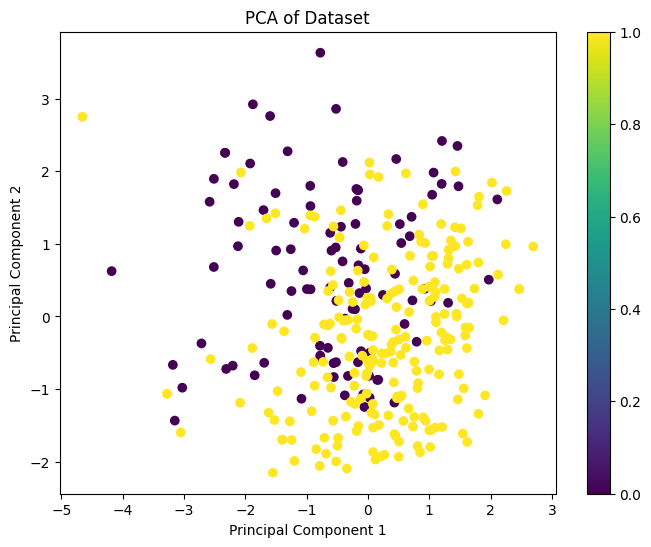

In [14]:
from sklearn.decomposition import PCA

# Initialize PCA, specifying the number of components
pca = PCA(n_components=2)  # You can start with 2 for visualization

# Fit and transform the data
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


print(pca.explained_variance_ratio_)

import matplotlib.pyplot as plt

target_variable = dataset['Decision']

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=target_variable, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar()
plt.show()

Accuracy: 0.6000

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.56      0.60        16
           1       0.56      0.64      0.60        14

    accuracy                           0.60        30
   macro avg       0.60      0.60      0.60        30
weighted avg       0.61      0.60      0.60        30



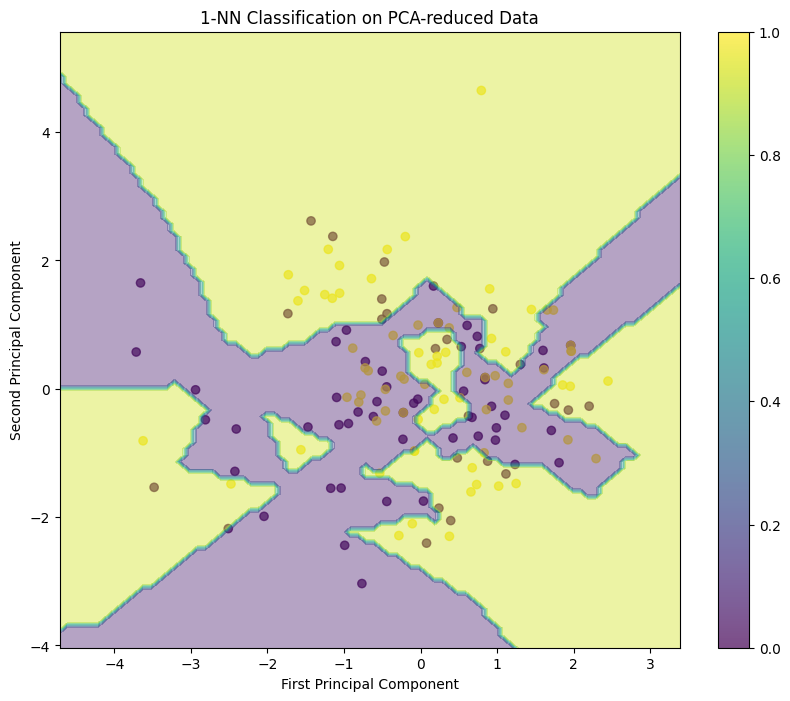

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have your original dataset in a variable called 'dataset'
# and your target variable is 'Decision'

# 1. Prepare the data
X = dataset.drop('Decision', axis=1)
y = dataset['Decision']

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA
pca = PCA(n_components=3)  # You can adjust the number of components
X_pca = pca.fit_transform(X_scaled)

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 5. Create and train the 1-NN model
nn_classifier = KNeighborsClassifier(n_neighbors=1)
nn_classifier.fit(X_train, y_train)

# 6. Make predictions
y_pred = nn_classifier.predict(X_test)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Visualize the results (for 2D PCA)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('1-NN Classification on PCA-reduced Data')
plt.colorbar(scatter)

# Plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = nn_classifier.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

plt.show()

5-Fold Cross-Validation Scores: [0.625      0.5        0.42857143 0.85714286 0.57142857]
Mean CV Score: 0.5964
Standard Deviation of CV Scores: 0.1462

Validation Accuracy: 0.5789

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.50      0.53        18
           1       0.59      0.65      0.62        20

    accuracy                           0.58        38
   macro avg       0.58      0.57      0.57        38
weighted avg       0.58      0.58      0.58        38


Test Accuracy: 0.4933

Test Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.41      0.47        41
           1       0.45      0.59      0.51        34

    accuracy                           0.49        75
   macro avg       0.50      0.50      0.49        75
weighted avg       0.51      0.49      0.49        75



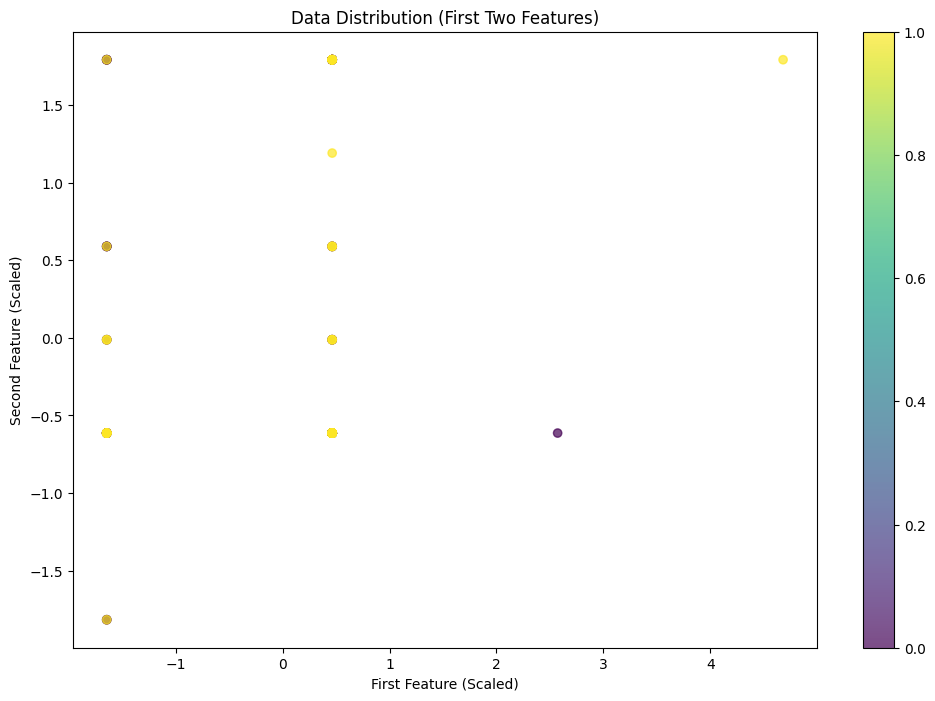

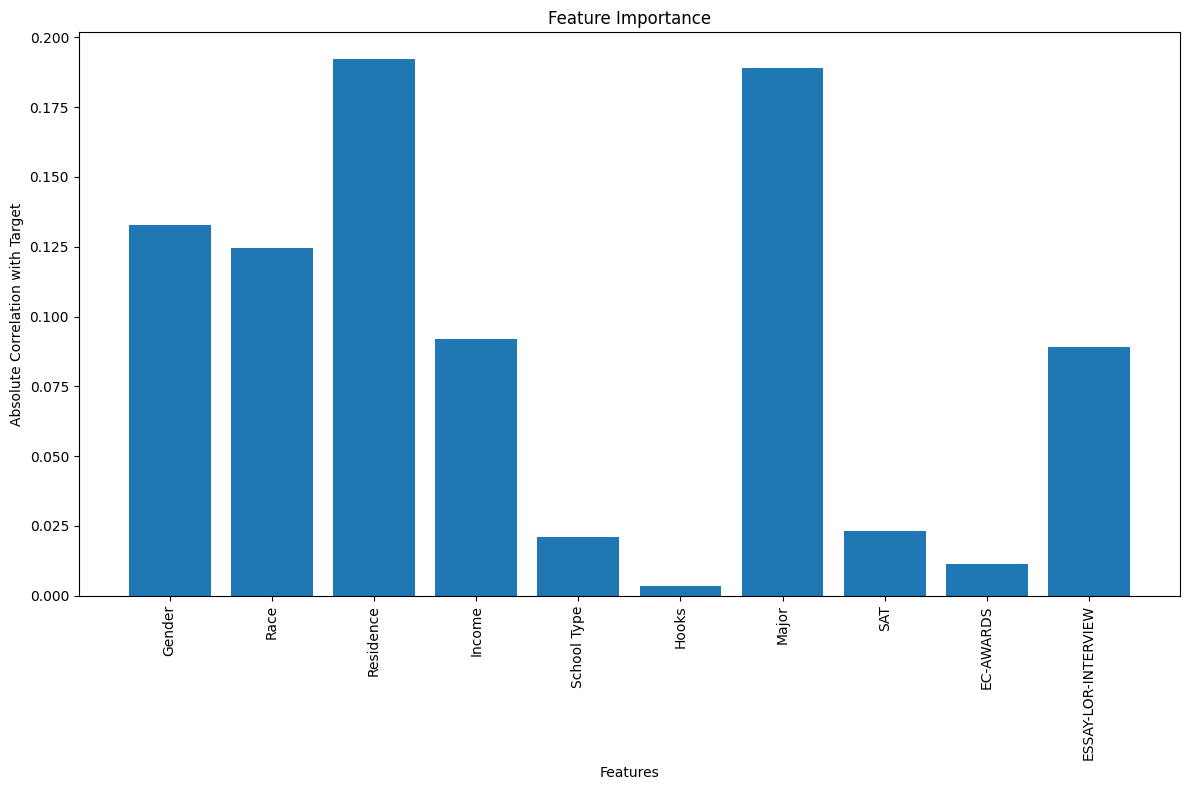

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming you have your original dataset in a variable called 'dataset'
# and your target variable is 'Decision'

# 1. Prepare the data
X = dataset.drop('Decision', axis=1)
y = dataset['Decision']

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Split the data into train+validation and test sets (50% each)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

# 4. Further split train+validation into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# 5. Create the 1-NN model
nn_classifier = KNeighborsClassifier(n_neighbors=1)

# 6. Perform k-fold cross-validation on the training set
k_folds = 5
cv_scores = cross_val_score(nn_classifier, X_train, y_train, cv=k_folds)

print(f"{k_folds}-Fold Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV Scores: {cv_scores.std():.4f}")

# 7. Train the model on the entire training set
nn_classifier.fit(X_train, y_train)

# 8. Evaluate on the validation set
y_val_pred = nn_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# 9. Final evaluation on the test set
y_test_pred = nn_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# 10. Visualize the results (for the first two features)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.xlabel('First Feature (Scaled)')
plt.ylabel('Second Feature (Scaled)')
plt.title('Data Distribution (First Two Features)')
plt.colorbar(scatter)
plt.show()

# 11. Feature Importance (using correlation with target)
feature_importance = abs(np.corrcoef(X_scaled.T, y)[:-1, -1])
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Target')
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()